# Library Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#pip install catboost
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.svm import NuSVC, SVR

In [2]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Data Loading 

In [3]:
cancer= pd.read_csv("data.csv")

In [4]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data preprocessing and visualization

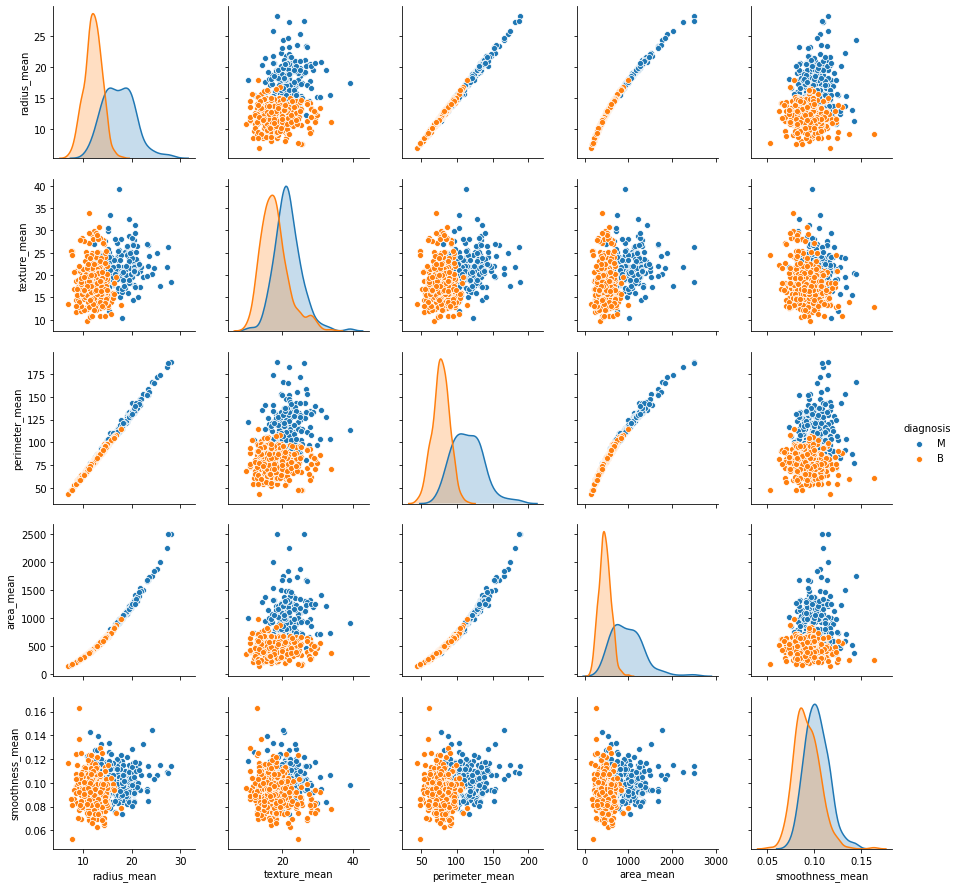

In [6]:
sns.pairplot(cancer,hue='diagnosis',vars=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'])

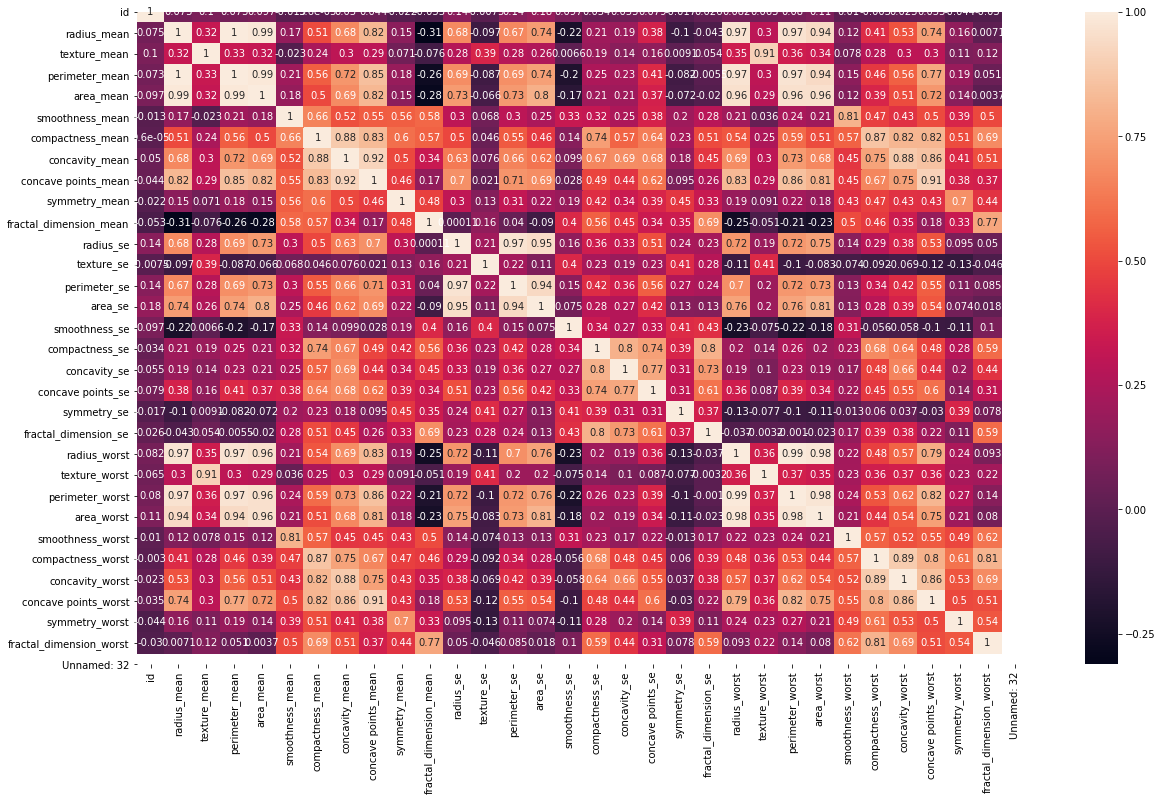

In [7]:
plt.figure(figsize=(20,12))
sns.heatmap(cancer.corr(),annot=True)

In [8]:
X=cancer.drop(['diagnosis','Unnamed: 32'],axis=1)
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y= cancer['diagnosis']
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [10]:

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)
y  = integer_encoded
'''
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)'''


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

'\nonehot_encoder = OneHotEncoder(sparse=False)\ninteger_encoded = integer_encoded.reshape(len(integer_encoded), 1)\nonehot_encoded = onehot_encoder.fit_transform(integer_encoded)\nprint(onehot_encoded)'

# 100 datas for preprocessing 

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_100 = sc.fit_transform(X[:100])

y_100 = y[:100]
print(y_100)
x_100

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1]


array([[-0.47944209,  0.98492491, -2.48967118, ...,  1.76492611,
         1.70202213,  1.12807902],
       [-0.47943505,  1.75912844, -0.51391142, ...,  0.59594194,
        -0.60570728, -0.13294804],
       [ 2.2558489 ,  1.49505902,  0.41648695, ...,  1.43513712,
         0.47023571, -0.19372043],
       ...,
       [-0.47878795, -1.47662217,  0.06625078, ..., -1.79193641,
        -1.62305315, -0.09665342],
       [-0.47878061, -0.93257915, -1.83197578, ..., -0.89856161,
        -0.57827884, -0.19456449],
       [-0.47877855, -0.0863567 ,  0.02080029, ...,  0.16162163,
        -0.6456032 ,  0.0573877 ]])

In [12]:
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=20)

In [13]:
print("Size of the training set 'X' (input features) is:",x_train.shape)
print('\n')
print("Size of the testing set 'X' (input features) is:",x_test.shape)
print('\n')
print("Size of the training set 'y' (output features) is:",y_train.shape)
print('\n')
print("Size of the testing set 'y' (output features) is:",y_test.shape)

Size of the training set 'X' (input features) is: (426, 31)


Size of the testing set 'X' (input features) is: (143, 31)


Size of the training set 'y' (output features) is: (426,)


Size of the testing set 'y' (output features) is: (143,)


# Satistical Analysis

In [14]:
def gen_features(X):
    s = []
    s.append(X.mean())
    s.append(X.std())
    s.append(X.min())
    s.append(X.kurtosis())
    s.append(X.skew())
    s.append(np.quantile(X,0.01))
    s.append(np.quantile(X,0.05))
    s.append(np.quantile(X,0.95))
    s.append(np.quantile(X,0.99))
    s.append(np.abs(X).std())
    s.append(np.abs(X).max())
    s.append(np.abs(X).mean())
    return pd.Series(s)
X_train_stat = pd.DataFrame()
stat = []
for df in x_train:
    #print(cancer[df].head())
    ch = gen_features(cancer[df])
    print(ch)
    #stat.append(ch)
    X_train_stat[df] = ch
    #X_train_stat.append(ch, ignore_index=True)


0     3.037183e+07
1     1.250206e+08
2     8.670000e+03
3     4.219319e+01
4     6.473752e+00
5     8.621004e+04
6     9.026700e+04
7     9.042446e+07
8     9.010343e+08
9     1.250206e+08
10    9.113205e+08
11    3.037183e+07
dtype: float64
0     14.127292
1      3.524049
2      6.981000
3      0.845522
4      0.942380
5      8.458360
6      9.529200
7     20.576000
8     24.371600
9      3.524049
10    28.110000
11    14.127292
dtype: float64
0     19.289649
1      4.301036
2      9.710000
3      0.758319
4      0.650450
5     10.930400
6     13.088000
7     27.150000
8     30.652000
9      4.301036
10    39.280000
11    19.289649
dtype: float64
0      91.969033
1      24.298981
2      43.790000
3       0.972214
4       0.990650
5      53.827600
6      60.496000
7     135.820000
8     165.724000
9      24.298981
10    188.500000
11     91.969033
dtype: float64
0      654.889104
1      351.914129
2      143.500000
3        3.652303
4        1.645732
5      215.664000
6      275.78000

In [15]:
X_train_stat.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1.844791e+08,11.259729,14.950045,73.554708,687.604042,0.178712,0.339937,0.396946,0.242496,0.300166,...,13.697206,19.650565,90.967185,1071.695668,0.173485,0.657116,0.548520,0.094932,0.723706,0.646252
std,3.404888e+08,9.159329,12.449062,62.591301,782.626419,0.242753,0.524216,0.636787,0.415018,0.360843,...,11.631116,16.321595,81.164031,1323.804148,0.151468,0.876877,0.556335,0.246819,1.230100,1.518392
min,6.473752e+00,0.845522,0.650450,0.972214,1.645732,0.014064,0.019380,0.000000,0.000000,0.027414,...,0.944090,0.224302,1.070150,1.859373,0.022832,0.027290,0.000000,-0.535535,0.061867,0.018061
25%,6.682503e+04,3.524049,4.301036,24.298981,197.623000,0.064648,0.049775,0.061036,0.030507,0.123631,...,4.833242,6.146258,33.602542,238.444000,0.083725,0.135801,0.161058,0.018215,0.171146,0.057695
50%,3.037183e+07,8.993780,12.009200,57.161800,351.914129,0.096360,0.104341,0.088799,0.048919,0.181162,...,9.870800,15.887400,63.063200,569.356993,0.132369,0.254265,0.272188,0.090169,0.290076,0.083946
75%,1.250206e+08,15.739469,21.254736,102.931775,818.616828,0.140516,0.294244,0.370466,0.173456,0.270673,...,18.611892,28.332917,123.355909,1162.837346,0.197331,0.848483,0.964344,0.244994,0.531131,0.157346
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.855975,1.650130,1.998638,1.171180,1.287933,...,36.040000,49.540000,251.200000,4254.000000,0.517825,3.039288,1.615253,0.492616,4.444560,5.244611


# SVM withSVC

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
svc_model =SVC(kernel = 'linear', random_state = 0)

In [18]:
svc_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
y_predict = svc_model.predict(x_test)
y_predict

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,55,2
is_healthy,2,84


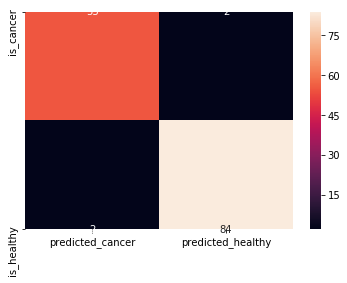

In [21]:
sns.heatmap(confusion, annot=True)

In [22]:
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_test, y_predict,target_names=all_labels))

classification Repot
              precision    recall  f1-score   support

           M       0.98      0.98      0.98        86
           B       0.96      0.96      0.96        57

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



AUC: 0.97


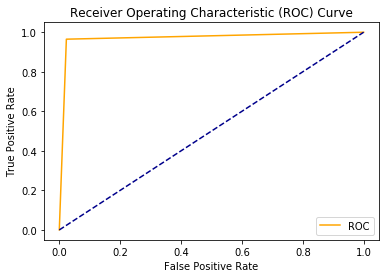

In [23]:
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fpr, tpr)

# 100 data prediction results

            predicted_cancer  predicted_healthy
is_cancer                 49                 16
is_healthy                 0                 35
classification Repot
              precision    recall  f1-score   support

           M       0.69      1.00      0.81        35
           B       1.00      0.75      0.86        65

    accuracy                           0.84       100
   macro avg       0.84      0.88      0.84       100
weighted avg       0.89      0.84      0.84       100



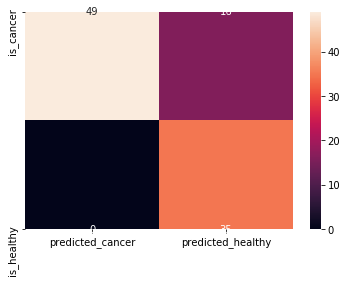

In [24]:
y_100_pred = svc_model.predict(x_100)
cm = np.array(confusion_matrix(y_100, y_100_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(confusion, annot=True)
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_100, y_100_pred,target_names=all_labels))

# SVM with RBF

In [25]:
svc_model = SVC(kernel = 'rbf', random_state = 0)
svc_model.fit(x_train, y_train)
y_predict = svc_model.predict(x_test)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion


,predicted_cancer,predicted_healthy
is_cancer,54,3
is_healthy,1,85


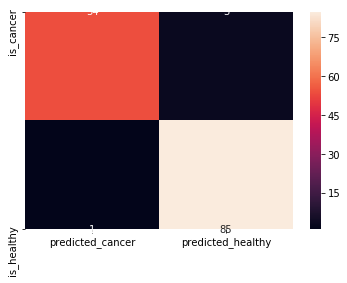

In [26]:
sns.heatmap(confusion, annot=True)

AUC: 0.97


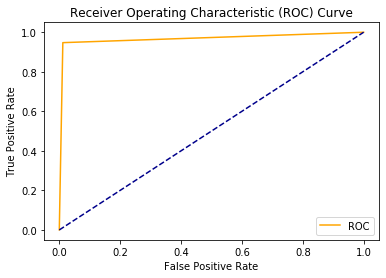

In [27]:
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fpr, tpr)

# predict 100 data

[1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0]
            predicted_cancer  predicted_healthy
is_cancer                 49                 16
is_healthy                 0                 35
classification Repot
              precision    recall  f1-score   support

           M       0.69      1.00      0.81        35
           B       1.00      0.75      0.86        65

    accuracy                           0.84       100
   macro avg       0.84      0.88      0.84       100
weighted avg       0.89      0.84      0.84       100



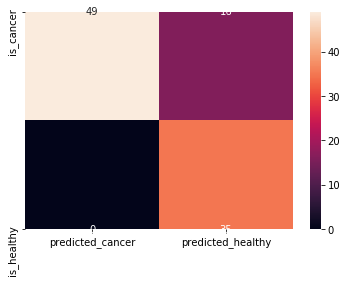

In [28]:
y_100_pred = svc_model.predict(x_100)
print(y_100_pred)
cm = np.array(confusion_matrix(y_100, y_100_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(confusion, annot=True)
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_100, y_100_pred,target_names=all_labels))

# Result compare with other machine learning algorithm

# RandomForestClassifier

In [29]:
model_r = RandomForestClassifier()
model_r.fit(x_train, y_train)
y_predict_r = model_r.predict_proba(x_test)

C:\Users\Debanik Roy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
cm = np.array(confusion_matrix(y_test, np.argmax(y_predict_r,axis=1), labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,55,2
is_healthy,3,83


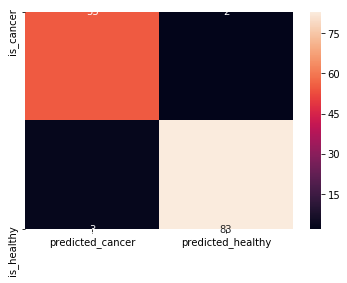

In [31]:
sns.heatmap(confusion, annot=True)

In [32]:
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_test, np.argmax(y_predict_r,axis=1),target_names=all_labels))

classification Repot
              precision    recall  f1-score   support

           M       0.98      0.97      0.97        86
           B       0.95      0.96      0.96        57

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



AUC: 0.97


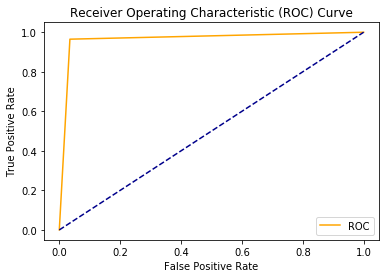

In [33]:
auc = roc_auc_score(y_test, np.argmax(y_predict_r,axis=1))
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(y_predict_r,axis=1))
plot_roc_curve(fpr, tpr)

# predict 100 data

            predicted_cancer  predicted_healthy
is_cancer                 46                 19
is_healthy                 0                 35
classification Repot
              precision    recall  f1-score   support

           M       0.65      1.00      0.79        35
           B       1.00      0.71      0.83        65

    accuracy                           0.81       100
   macro avg       0.82      0.85      0.81       100
weighted avg       0.88      0.81      0.81       100



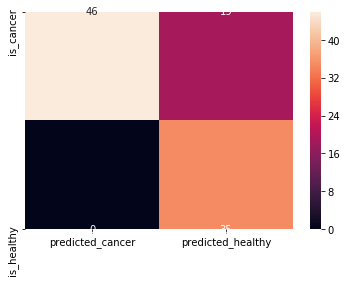

In [34]:
y_100_pred = model_r.predict_proba(x_100)
#print(y_100_pred)
cm = np.array(confusion_matrix(y_100, np.argmax(y_100_pred, axis=1), labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(confusion, annot=True)
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_100, np.argmax(y_100_pred, axis=1),target_names=all_labels))

# KNeighborsClassifier

In [35]:
model_k = KNeighborsClassifier()
model_k.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
y_predict_k = model_k.predict_proba(x_test)

In [37]:
cm = np.array(confusion_matrix(y_test, np.argmax(y_predict_k,axis=1), labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion


,predicted_cancer,predicted_healthy
is_cancer,53,4
is_healthy,2,84


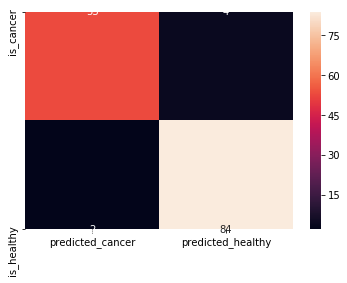

In [38]:
sns.heatmap(confusion, annot=True)

In [39]:
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_test, np.argmax(y_predict_r,axis=1),target_names=all_labels))

classification Repot
              precision    recall  f1-score   support

           M       0.98      0.97      0.97        86
           B       0.95      0.96      0.96        57

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



AUC: 0.95


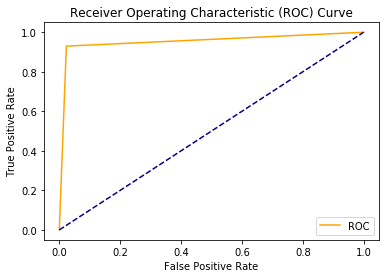

In [40]:
auc = roc_auc_score(y_test, np.argmax(y_predict_k,axis=1))
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(y_predict_k,axis=1))
plot_roc_curve(fpr, tpr)

# Predict 100 data

            predicted_cancer  predicted_healthy
is_cancer                 49                 16
is_healthy                 0                 35
classification Repot
              precision    recall  f1-score   support

           M       0.69      1.00      0.81        35
           B       1.00      0.75      0.86        65

    accuracy                           0.84       100
   macro avg       0.84      0.88      0.84       100
weighted avg       0.89      0.84      0.84       100



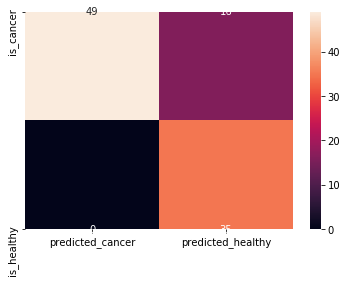

In [41]:
y_100_pred = model_k.predict_proba(x_100)
#print(y_100_pred)
cm = np.array(confusion_matrix(y_100, np.argmax(y_100_pred, axis=1), labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(confusion, annot=True)
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_100, np.argmax(y_100_pred, axis=1),target_names=all_labels))

# LogisticRegression

In [42]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\Debanik Roy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_predict_l = classifier.predict_proba(x_test)
cm = np.array(confusion_matrix(y_test, np.argmax(y_predict_l,axis=1), labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion


,predicted_cancer,predicted_healthy
is_cancer,54,3
is_healthy,0,86


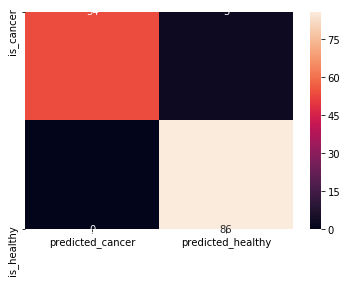

In [44]:
sns.heatmap(confusion, annot=True)

In [45]:
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_test, np.argmax(y_predict_l,axis=1),target_names=all_labels))

classification Repot
              precision    recall  f1-score   support

           M       0.97      1.00      0.98        86
           B       1.00      0.95      0.97        57

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



AUC: 0.97


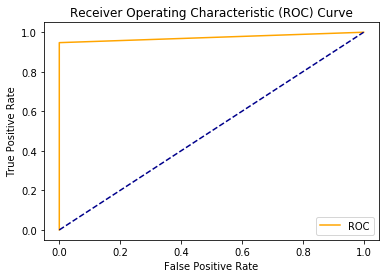

In [46]:
auc = roc_auc_score(y_test, np.argmax(y_predict_l,axis=1))
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(y_predict_l,axis=1))
plot_roc_curve(fpr, tpr)

# Predict 100 data

            predicted_cancer  predicted_healthy
is_cancer                 51                 14
is_healthy                 0                 35
classification Repot
              precision    recall  f1-score   support

           M       0.71      1.00      0.83        35
           B       1.00      0.78      0.88        65

    accuracy                           0.86       100
   macro avg       0.86      0.89      0.86       100
weighted avg       0.90      0.86      0.86       100



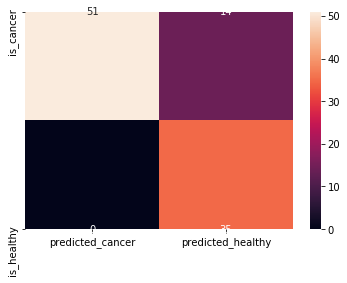

In [47]:
y_100_pred = classifier.predict_proba(x_100)
#print(y_100_pred)
cm = np.array(confusion_matrix(y_100, np.argmax(y_100_pred, axis=1), labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(confusion, annot=True)
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_100, np.argmax(y_100_pred, axis=1),target_names=all_labels))

# GaussianNB (Naïve Bayes)

In [48]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_predict_G = classifier.predict_proba(x_test)
cm = np.array(confusion_matrix(y_test, np.argmax(y_predict_G,axis=1), labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion


,predicted_cancer,predicted_healthy
is_cancer,53,4
is_healthy,6,80


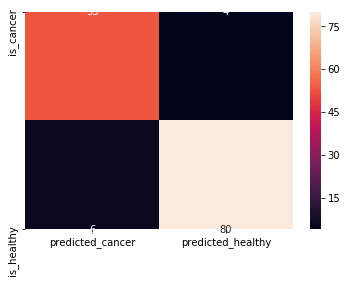

In [50]:
sns.heatmap(confusion, annot=True)

In [51]:
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_test, np.argmax(y_predict_G,axis=1),target_names=all_labels))

classification Repot
              precision    recall  f1-score   support

           M       0.95      0.93      0.94        86
           B       0.90      0.93      0.91        57

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



AUC: 0.93


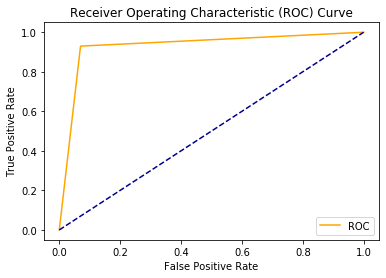

In [52]:
auc = roc_auc_score(y_test, np.argmax(y_predict_G,axis=1))
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(y_predict_G,axis=1))
plot_roc_curve(fpr, tpr)

# Predict 100 data

            predicted_cancer  predicted_healthy
is_cancer                 45                 20
is_healthy                 0                 35
classification Repot
              precision    recall  f1-score   support

           M       0.64      1.00      0.78        35
           B       1.00      0.69      0.82        65

    accuracy                           0.80       100
   macro avg       0.82      0.85      0.80       100
weighted avg       0.87      0.80      0.80       100



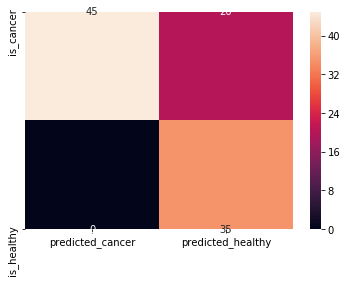

In [53]:
y_100_pred = classifier.predict_proba(x_100)
#print(y_100_pred)
cm = np.array(confusion_matrix(y_100, np.argmax(y_100_pred, axis=1), labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(confusion, annot=True)
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_100, np.argmax(y_100_pred, axis=1),target_names=all_labels))

# Decision Tree Algorithm

In [54]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [55]:
y_predict_D = classifier.predict_proba(x_test)
cm = np.array(confusion_matrix(y_test, np.argmax(y_predict_D,axis=1), labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion


,predicted_cancer,predicted_healthy
is_cancer,53,4
is_healthy,4,82


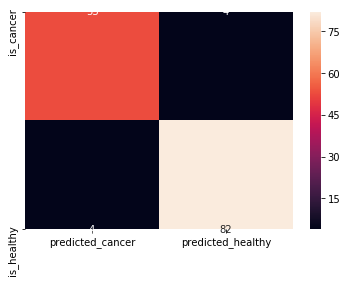

In [56]:
sns.heatmap(confusion, annot=True)

In [57]:
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_test, np.argmax(y_predict_D,axis=1),target_names=all_labels))

classification Repot
              precision    recall  f1-score   support

           M       0.95      0.95      0.95        86
           B       0.93      0.93      0.93        57

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



AUC: 0.94


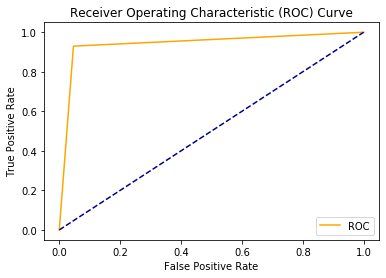

In [58]:
auc = roc_auc_score(y_test, np.argmax(y_predict_D,axis=1))
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(y_predict_D,axis=1))
plot_roc_curve(fpr, tpr)

# Predict 100 data

            predicted_cancer  predicted_healthy
is_cancer                 48                 17
is_healthy                 0                 35
classification Repot
              precision    recall  f1-score   support

           M       0.67      1.00      0.80        35
           B       1.00      0.74      0.85        65

    accuracy                           0.83       100
   macro avg       0.84      0.87      0.83       100
weighted avg       0.89      0.83      0.83       100



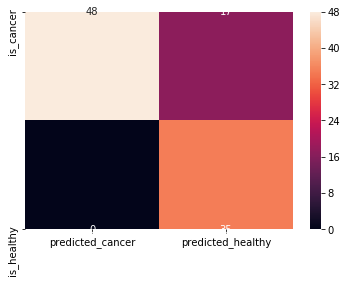

In [59]:
y_100_pred = classifier.predict_proba(x_100)
#print(y_100_pred)
cm = np.array(confusion_matrix(y_100, np.argmax(y_100_pred, axis=1), labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(confusion, annot=True)
print("classification Repot")
all_labels = ['M','B']
print(classification_report(y_100, np.argmax(y_100_pred, axis=1),target_names=all_labels))

# catboost

In [60]:
train_pool = Pool(x_train,y_train)
m = CatBoostRegressor(iterations=1000, loss_function="MAE", boosting_type="Ordered")
m.fit(x_train,y_train, silent=True)
m.best_score_

{'learn': {'MAE': 0.02804645084439716}}

In [61]:
y_pred_c = m.predict(np.argmax(x_test,axis=1))

In [62]:
y_pred_c

0.9406923110069474

# GridSearchCV

In [63]:
parameters = [{'gamma': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1],
               'C': [0.1, 0.2, 0.25, 0.5, 1, 1.5, 2]}]
               #'nu': [0.75, 0.8, 0.85, 0.9, 0.95, 0.97]}]
reg1 = GridSearchCV(SVR(kernel='rbf', tol=0.01), parameters, cv=5, scoring='neg_mean_absolute_error')
reg1.fit(x_train, y_train.flatten())
y_pred1 = reg1.predict(x_train)

print("Best CV score: {:.4f}".format(reg1.best_score_))
print(reg1.best_params_)
#print(y_pred1)

Best CV score: -0.1374
{'C': 2, 'gamma': 0.02}
